In [2]:
# SECOND PATTERN FOUND (p 1s, + 3, p 1s)
# This worksheet is to play around with the new (potential) infinite family of 5-vert-critical circulant graphs 
# Melvin Adekanye and Ben Cameron found by mining Brendan McKay's circulant graph data.
# The sheet is very rough and care should be taken when testing for sub_search != None and sub_search == None
#
#

def circulant(n, L):

    E = []

    for i in range(n):

        for j in range(i+1, n):

            if(((i-j) % n) in L):

                if({i, j} not in E):

                    E.append({i, j})

    # Return the graph
    return E
from sage.graphs.graph_coloring import vertex_coloring
def is_kcrit(G,k):
    V = G.vertices()
    chi = G.chromatic_number()
    if(chi != k):
        return False
    
    for v in V:
        H = Graph(G) #creates local copy of G so we can delete vertices and maintain G's structure
        H.delete_vertex(v)
        if vertex_coloring(H, k=k-1, value_only=True) == False:
            return False
    return True

In [4]:
# need p>=4.
# returns the list of parameters (PATTERN 2) for a circulant graph on 4p+1 vertices that always appears to be 5-critical.
def potential_list2(p):
    return [i for i in range(p, 2*p)] + [i for i in range(2*p+2,3*p+2)]

In [6]:
for i in range(4,8):
    print(potential_list2(i))

[4, 5, 6, 7, 10, 11, 12, 13]
[5, 6, 7, 8, 9, 12, 13, 14, 15, 16]
[6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19]
[7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22]


In [7]:
for p in range(4,12):
    G = Graph(circulant(4*p+1,potential_list2(p)))
    print(is_kcrit(G,5))

True
True
True
True
True
True
True
True


In [8]:
H = graphs.PathGraph(4).disjoint_union(graphs.PathGraph(1))
for p in range(4,12):
    G = Graph(circulant(4*p+1,potential_list2(p)))
    sub_search = G.subgraph_search_count(H, induced=True)
    print(sub_search)

510
1302
2850
5684
10560
18500
30832
49230


In [9]:
# The following is a generalizing the Gr and Gp constructions for 4- and 5-crit graphs, resp. to create
# an infinite family of (k+1)-crit graphs for each k>=2
def Gq(q, k):
    L = []
    
    for i in range(0, k*q+1):
        e1 = {i, (i+1) % (k*q+1)}
        e2 = {i, (i-1) % (k*q+1)}
        
        if e1 not in L:
            L.append(e1)

        if e2 not in L:
            L.append(e2)

        for j in range(0, q):
            for m in range(2, k):
                e1 = {i, (i+k*j+m) % (k*q+1)}

                if e1 not in L:
                    L.append(e1)

    return Graph(L)

In [10]:
for p in range(4,12):
    G = Graph(circulant(4*p+1,potential_list2(p)))
    H = Gq(p,4)
    print(G.is_isomorphic(H))

False
False
False
False
False
False
False
False


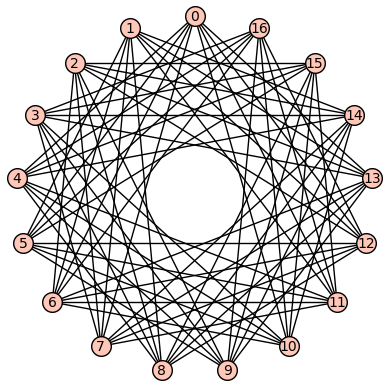

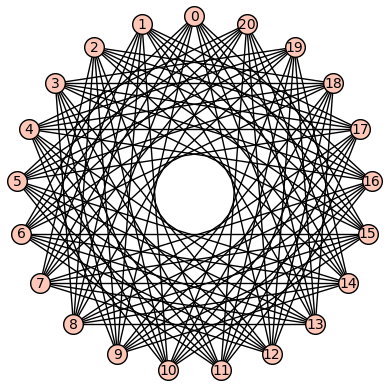

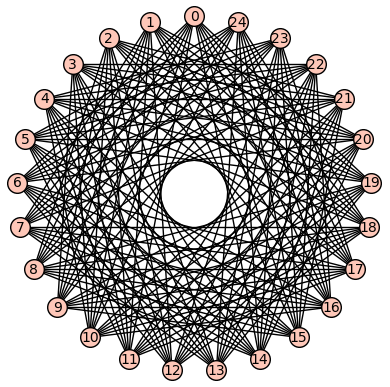

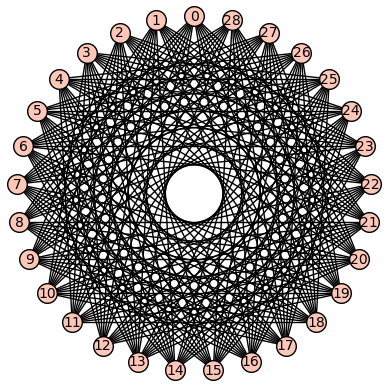

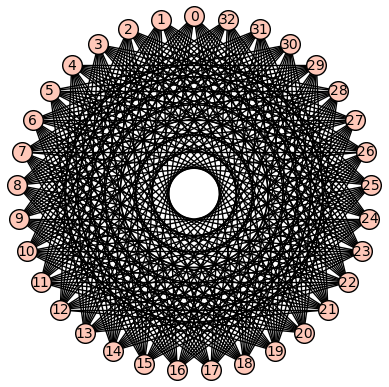

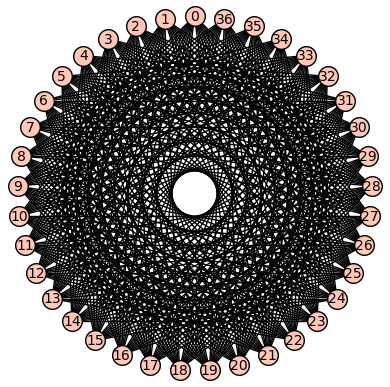

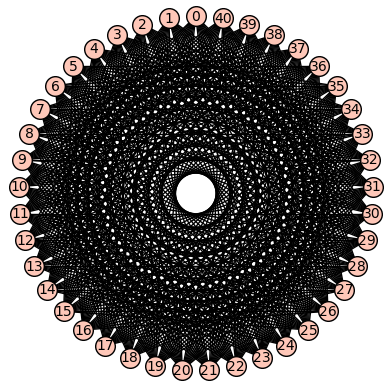

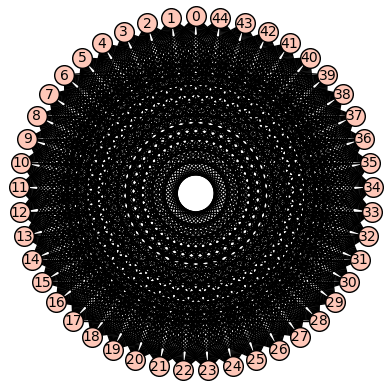

In [11]:
for p in range(4,12):
    G = Graph(circulant(4*p+1,potential_list2(p)))
    G.show(layout="circular")